In [4]:
import pandas as pd 
import numpy as np # thư viện xử lý số học trong python
import json as js # thư viện xử lý dữ liệu dạng json trong python
import re  # thư viện cung cấp xử lý , tìm kiếm một chuỗi kí tự đặc biệt trong một chuỗi kí tự

In [5]:
data = pd.read_csv("TuyenVanHoaOfficial_data.csv")

In [6]:
data.head()

Unnamed: 0                                               text  \
0         114  CHIẾC ÁO ĐẤU CÓ GÌ MÀ KHIẾN ĐÀN ÔNG NHÌN NHAU ...   
1         115  MU đang dẫn 3-1, Onana mắc sai lầm giúp Galata...   
2         116  MU buộc phải thắng Bayern ở lượt cuối và mong ...   
3         117                       4-0 cho Arsenal sau 27 phút.   
4         118  🚨 KỶ LỤC: Manchester United đã nhận 14 bàn thu...   

                                           post_text shared_text  \
0  CHIẾC ÁO ĐẤU CÓ GÌ MÀ KHIẾN ĐÀN ÔNG NHÌN NHAU ...         NaN   
1  MU đang dẫn 3-1, Onana mắc sai lầm giúp Galata...         NaN   
2  MU buộc phải thắng Bayern ở lượt cuối và mong ...         NaN   
3                       4-0 cho Arsenal sau 27 phút.         NaN   
4  🚨 KỶ LỤC: Manchester United đã nhận 14 bàn thu...         NaN   

   original_text                 time     timestamp  \
0            NaN  2023-11-30 10:49:45  1.701316e+09   
1            NaN  2023-11-30 09:58:33  1.701313e+09   
2            NaN  2023-11-30 07:18:39  1.701304e+09   
3            NaN  2023-11-30 03:30:20  1.701290e+09   
4            NaN  2023-11-30 02:57:54  1.701288e+09   

                                               image  \
0                                                NaN   
1                                                NaN   
2  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                    image_lowquality  \
0  https://scontent.fhan14-2.fna.fbcdn.net/v/t39....   
1  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
2  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                              images  ... with  \
0                                                 []  ...  NaN   
1                                                 []  ...  NaN   
2  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...  NaN   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...  NaN   
4  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...  NaN   

            page_id sharers      image_id            image_ids  was_live  \
0  1533122843659508     NaN  9.365239e+14  ['936523901168814']     False   
1  1533122843659508     NaN  9.365073e+14  ['936507261170478']     False   
2  1533122843659508     NaN  9.364530e+14  ['936452997842571']     False   
3  1533122843659508     NaN  9.363854e+14  ['936385414515996']     False   
4  1533122843659508     NaN  9.363746e+14  ['936374631183741']     False   

                 fetched_time  video_ids  videos header  
0  2023-11-30 14:32:31.336420        NaN     NaN    NaN  
1  2023-11-30 14:32:37.393088        NaN     NaN    NaN  
2  2023-11-30 14:33:33.906905        NaN     NaN    NaN  
3  2023-11-30 14:34:07.787294        NaN     NaN    NaN  
4  2023-11-30 14:34:22.335749        NaN     NaN    NaN  

[5 rows x 54 columns]

### Loại Bỏ Các Cột Không Dùng Tới Trong Phân Tích

In [7]:
data.columns

Index(['Unnamed: 0', 'text', 'post_text', 'shared_text', 'original_text',
       'time', 'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'fetched_time', 'video_ids', 'videos', 'header'],
      dtype='object')

In [8]:
columns = ['shared_text' ,'original_text','text' , 'timestamp', 'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width','post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available','with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'fetched_time', 'video_ids', 'videos', 'header' , 'likes' , 'reactors']
data.drop(columns = columns, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        197 non-null    int64 
 1   post_text         197 non-null    object
 2   time              197 non-null    object
 3   image             172 non-null    object
 4   image_lowquality  197 non-null    object
 5   images            197 non-null    object
 6   comments          197 non-null    int64 
 7   shares            197 non-null    int64 
 8   comments_full     197 non-null    object
 9   w3_fb_url         197 non-null    object
 10  reactions         197 non-null    object
 11  reaction_count    197 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 18.6+ KB


### Đổi tên lại các cột

In [10]:
data.rename(columns = {'Unnamed: 0' : 'Index', 'w3_fb_url' : 'url'} , inplace = True)

### Đặt lại index

In [11]:
data.set_index('Index' , inplace = True )

In [12]:
data.reset_index(inplace = True , drop = True)

### Đặt lại column : time thành DateTime

In [13]:
data['time'] = pd.to_datetime(data['time'])

In [14]:
print(data['time'].dtype)

datetime64[ns]


### Xóa những hàng bị miss data khi crawl

##### Giải thích : khi crawl dữ liệu bằng facebook_scraper thường xảy ra lỗi missing data đặc biệt là sau 100 post, nếu một hàng chứa các dữ liệu đồng thời bị :shares = 0 , comments_full = [], reactions_count = 0 , url = NAN, reactions = NAN,   ... thì chắc chắn xảy ra miss data nên cần bỏ các hàng này đi  

In [15]:
condition = data[['url', 'reactions']].isna().any(1) & (data['shares'] == 0) & (data['reaction_count'] == 0)
data = data[~condition]

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\2260419349.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  condition = data[['url', 'reactions']].isna().any(1) & (data['shares'] == 0) & (data['reaction_count'] == 0)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   post_text         197 non-null    object        
 1   time              197 non-null    datetime64[ns]
 2   image             172 non-null    object        
 3   image_lowquality  197 non-null    object        
 4   images            197 non-null    object        
 5   comments          197 non-null    int64         
 6   shares            197 non-null    int64         
 7   comments_full     197 non-null    object        
 8   url               197 non-null    object        
 9   reactions         197 non-null    object        
 10  reaction_count    197 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 18.5+ KB


### xử lý reactions trong dataframe

In [17]:
reac = data['reactions'][0]
after = reac.replace("'" , '"')
print(after)
print(type(after))

{"thích": 171, "yêu thích": 20, "haha": 2, "thương thương": 1}
<class 'str'>


In [18]:
dict_data = js.loads(after)

In [19]:
print(dict_data['thích'])

171


In [20]:
reactions = pd.json_normalize(dict_data)
reactions

thích  yêu thích  haha  thương thương
0    171         20     2              1

In [21]:
reations = data['reactions'].apply(lambda x : x.replace("'", '"'))
dict_reac = reations.apply(js.loads)
df_reactions = pd.json_normalize(dict_reac)
df_reactions

thích  yêu thích    haha  thương thương   wow  buồn  phẫn nộ
0      171         20     2.0            1.0   NaN   NaN      NaN
1     1064          2   359.0            1.0   2.0  18.0      1.0
2     3155         20  1706.0            5.0  12.0  31.0      6.0
3     3671         59   409.0            2.0   7.0   2.0      NaN
4     2093         10  1564.0            3.0  10.0  60.0     11.0
..     ...        ...     ...            ...   ...   ...      ...
192   8162       1140   229.0           37.0   3.0   2.0     17.0
193   2712         28   427.0            2.0   3.0   NaN      NaN
194   6742        661    15.0           17.0   NaN   NaN      NaN
195   2839        249     4.0            1.0   NaN   NaN      NaN
196  15904        494  3730.0           39.0  56.0  40.0      4.0

[197 rows x 7 columns]

In [22]:
df_reactions = df_reactions.apply(lambda x : x.fillna(0).astype('int64'))

In [23]:
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   thích          197 non-null    int64
 1   yêu thích      197 non-null    int64
 2   haha           197 non-null    int64
 3   thương thương  197 non-null    int64
 4   wow            197 non-null    int64
 5   buồn           197 non-null    int64
 6   phẫn nộ        197 non-null    int64
dtypes: int64(7)
memory usage: 10.9 KB


In [24]:
data = data.join(df_reactions)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   post_text         197 non-null    object        
 1   time              197 non-null    datetime64[ns]
 2   image             172 non-null    object        
 3   image_lowquality  197 non-null    object        
 4   images            197 non-null    object        
 5   comments          197 non-null    int64         
 6   shares            197 non-null    int64         
 7   comments_full     197 non-null    object        
 8   url               197 non-null    object        
 9   reactions         197 non-null    object        
 10  reaction_count    197 non-null    int64         
 11  thích             197 non-null    int64         
 12  yêu thích         197 non-null    int64         
 13  haha              197 non-null    int64         
 14  thương thương     197 non-

### xử lý comment_full

In [26]:
text = data['comments_full'][2]
text = text.replace("'" , '"')
text = text.replace("None" , "")
print(text)

[{"comment_id": "1501303200659427", "comment_url": "https://facebook.com/1501303200659427", "commenter_id": "100004448378016", "commenter_url": "https://facebook.com/quyen.hoangvan.71?eav=AfZrGHjtwLqq0PkOwOCODyvUMlLf2HGeG0cvAyNo6a3TtUKVb05OeD4xWVjdg3DRojo&fref=nf&rc=p&refid=52&__tn__=R&paipv=0", "commenter_name": "Hoàng Quyền", "commenter_meta": , "comment_text": "Mu đá hay vkl", "comment_time": datetime.datetime(2023, 11, 4, 0, 0), "comment_image": "https://scontent.fhan14-4.fna.fbcdn.net/m1/v/t6/An_F9bJG7govfshSMBkvcRLcxT0jmiXVYKtr7lgH5AHgUrjjpZ1OD0xyxXYgf7arc0lWgCdrR_KN4Mg7RSN3Gm3W6Gg03N1tQ-ZXzVvFJ_KvvB4.png?ccb=10-5&oh=00_AfCF25qFGlutGRILWmJvlA1yzyVvkMA6kp_LVZ8vr26GOA&oe=658FA367&_nc_sid=7da55a", "comment_reactors": [{"name": "Hiếu Hoàng", "link": "https://facebook.com/profile.php?id=100004232204780&eav=AfbNNEzPt4bdXKpQEatSYrvDq5CVz1w9YE8b4j2LpvrcIQeMJi0659-DrN_VdjKgiB0&fref=pb&paipv=0", "type": "haha"}], "comment_reactions": {"haha": 1}, "comment_reaction_count": 1, "replies": []}

In [27]:
pattern = r'"comment_text": ".*?"'
results = re.findall(pattern, text)
comment_texts = [r.split('": "')[1][:-1] for r in results]
print(comment_texts)

['Mu đá hay vkl', 'Về đá EPL tiếp thôi…', 'Học trò ,nhưng là trò hề của Erik TenHang', 'Mission impossible', 'Chắc đ có điều gì xảy ra đâu, xem đá ức chế vc.', 'Thoii có vào trong thì bị nó đấm cho cung. Nhục', 'Bắt hài vl gặp bayern chắc 5 -0', '3 đời sau nhé gã hàng xóm ồn của mc 😂😂', 'Mu thua 2 th kia hoà thế là c2 cũng k dc uống😂', 'C2 còn ko có cửa', 'Thắng dk Bayer thì đúng là MU họ thật biết chơi đùa 😂', 'Minh Hướng thắng Bayern chỉ là điều kiện cần 😂 nói chung tỉ lệ để MU đi tiếp chỉ vài phần trăm 🤣', 'Brandy de Jerez kh có quyền quyết định r C1 tính thành tích đối đầu lượt trận cuối 2 đội kia không hòa là MU loại r', 'Brandy de Jerez 0,01% 😂 MU chắc họ chán c1 rồi muống uống c2 cho thanh mát 🤣', 'Thôi bỏ!', 'Thua luôn bayer out luôn c2', 'Mu hết thời rồi', 'Đầu trọc sẽ ra tuyệt chiêu cuối cùng 👉gián long thập bát chưởng 👈 để hạ gục đại diện cổ xe tăng 😁😁😁😁😁', 'Trình Minh Chính mơ cũng chưa có nhan bạn', 'cái a onana này còn làm thủ môn thì MU khó làm nên chuyện']


In [28]:
def comment_full_to_text(text):
    text = text.replace("'" , '"')
    pattern = r'"comment_text": ".*?"'
    results = re.findall(pattern, text)
    comment_texts = [r.split('": "')[1][:-1] for r in results]
    return comment_texts

data['comments_text'] = data['comments_full'].apply(comment_full_to_text)

In [29]:
data['comments_text'].head(5)

0    [Lập team đá bóng ăn cu đơ các thầy ơi 🙈🙈🙈, Ch...
1    [2 quả đá phạt vào hài vclll, HLV Park đang th...
2    [Mu đá hay vkl, Về đá EPL tiếp thôi…, Học trò ...
3    [Nguyễn Xuân Nhật 🙂, Chắc phải mua c2 uống rồi...
4    [đến giờ vẫn k hiểu tại sao lai k gia hạn với ...
Name: comments_text, dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   post_text         197 non-null    object        
 1   time              197 non-null    datetime64[ns]
 2   image             172 non-null    object        
 3   image_lowquality  197 non-null    object        
 4   images            197 non-null    object        
 5   comments          197 non-null    int64         
 6   shares            197 non-null    int64         
 7   comments_full     197 non-null    object        
 8   url               197 non-null    object        
 9   reactions         197 non-null    object        
 10  reaction_count    197 non-null    int64         
 11  thích             197 non-null    int64         
 12  yêu thích         197 non-null    int64         
 13  haha              197 non-null    int64         
 14  thương thương     197 non-

#  ------ Data Analize

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import plotly.express as px

### Phân tích về tương tác qua các bài viết

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


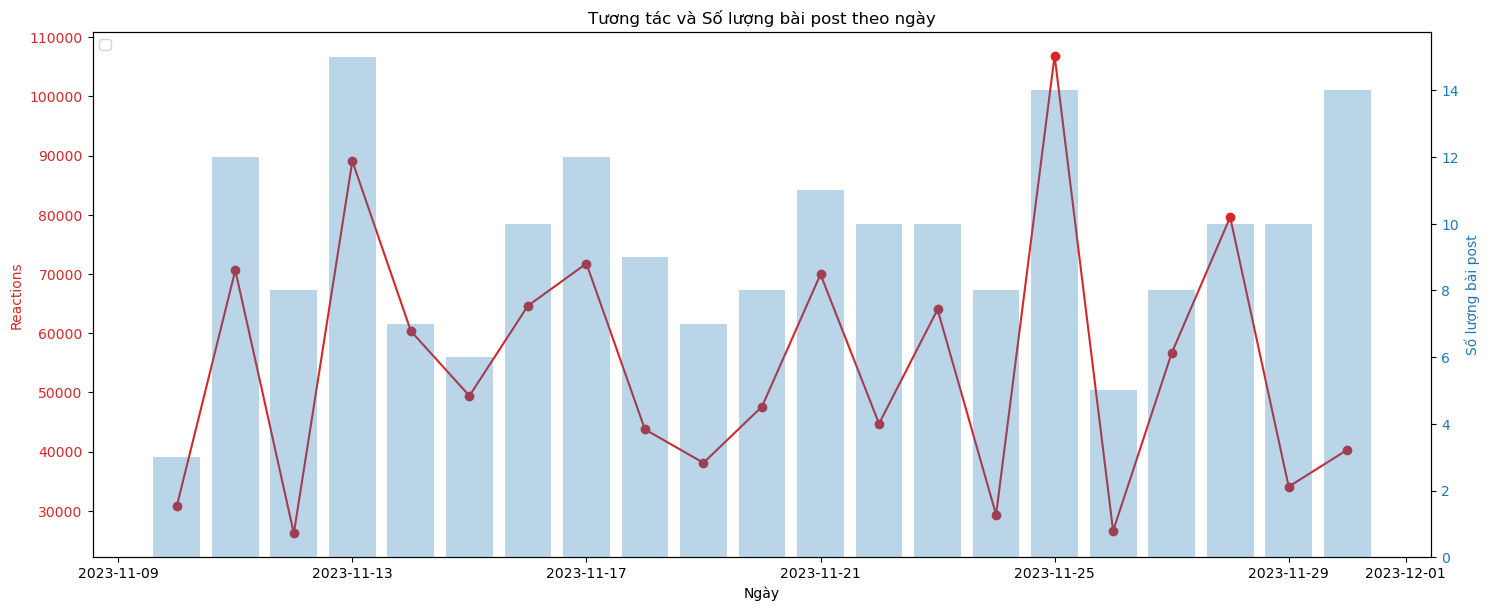

In [32]:
reactions_per_day = data.groupby(pd.Grouper(key = 'time' , freq = 'D')).reaction_count.sum()
posts_per_day = data.groupby(data.time.dt.date).size()

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:red'
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Reactions', color=color)
ax1.plot(reactions_per_day.index, reactions_per_day, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Số lượng bài post', color=color)
ax2.bar(posts_per_day.index, posts_per_day, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tương tác và Số lượng bài post theo ngày')
plt.legend(loc = 'upper left')

plt.show()

# Hiển thị biểu đồ
plt.show()

In [33]:
reactions_per_day.values.mean()
#posts_per_day.values.mean()

54484.09523809524

+ *data* : Lượng reactions và số lượng bài viết biến đổi tương đối đồng đều theo ngày cao nhất vào ngày 25-11-2023 và thấp nhất là ngày 12-11-2023

+ *Context*: ngày 13 là ngày diễn ra trận siêu kinh điển giữa Manchester City và Chelse nên có lượng bài post cao đột biến nhằm thu hút lượng tương tác của người xem tuy nhiên có thể thấy việc đăng 15 bài so với trung bình là một ngày là 8,7 cao hơn 72% bài đăng so với một ngày nhưng lượng tương tác chỉ cao hơn 60% so với trung bình một ngày  

+ *Action* : Thay đổi chiến lược vào những ngày có những trận siêu kinh điển thì tập trung chính vào nội dung của bài viết thay vì đăng nhiều bài viết kém chất lượng dần dần sẽ khiến cho lượng người theo dõi giảm sút


## Phân tích lượng bài post được đăng theo khoảng từng thời gian

In [34]:
time = '1H'
posts_time = data.groupby(pd.Grouper(key = 'time' , freq = time)).size()
posts_time.head(30)

time
2023-11-10 18:00:00    1
2023-11-10 19:00:00    0
2023-11-10 20:00:00    1
2023-11-10 21:00:00    1
2023-11-10 22:00:00    0
2023-11-10 23:00:00    0
2023-11-11 00:00:00    0
2023-11-11 01:00:00    0
2023-11-11 02:00:00    0
2023-11-11 03:00:00    0
2023-11-11 04:00:00    0
2023-11-11 05:00:00    0
2023-11-11 06:00:00    1
2023-11-11 07:00:00    0
2023-11-11 08:00:00    1
2023-11-11 09:00:00    0
2023-11-11 10:00:00    1
2023-11-11 11:00:00    0
2023-11-11 12:00:00    0
2023-11-11 13:00:00    0
2023-11-11 14:00:00    1
2023-11-11 15:00:00    0
2023-11-11 16:00:00    1
2023-11-11 17:00:00    0
2023-11-11 18:00:00    0
2023-11-11 19:00:00    1
2023-11-11 20:00:00    1
2023-11-11 21:00:00    1
2023-11-11 22:00:00    2
2023-11-11 23:00:00    2
Freq: H, dtype: int64

In [35]:
post_time = posts_time.groupby(posts_time.index.hour).sum()
post_time.index = pd.to_datetime(post_time.index, format= '%H')
post_time.index = post_time.index.strftime('%H:%M:%S')
fig = px.line(post_time , x = post_time.index , y = post_time.values)
fig.update_layout(
    xaxis=dict(title='Thời gian'),
    yaxis=dict(title='Số lượng bài post', tickformat='%H:%M:%S'),
    legend=dict(x=0, y=1, traceorder='normal'),
    width=900,
    height=500
)
fig.show()

+ *data* : lượng bài post được đăng nhiều nhất vào khoảng từ 18h đến 22h và khoảnh từ 6h - 8h
+ *context* : khoảng từ 18h - 22h theo giờ việt nam sẽ tương đương từ 11h-14h theo giờ anh và khoảng từ 12-15h theo giờ tây ban nha đây thường xuyên là khoảng thời gian diễn ra các trận bóng lớn của 2 giải bóng đá lớn nhất hành tinh là premier league và laliga , khoảng từ 6h - 8h là khoảng thời gian thức dậy của người việt nam và họ thường xuyên có thói quen cập nhật tin tức đặc biệt là thể thao vào giờ này 
+ *Action* : + vào khung giờ từ 6h tời 8h sang thì là khoảng thời gian thức dậy và người dùng luôn muốn cập nhật thông tin một cách nhanh trong , nên triển khai các video ngắn tổng kết kết quả các chận đấu , các bài viết ngắn về tỉ số và hình chung lại xếp hạng của các đội tuyển 
             + vào khung giờ từ 18h tới 21h đây thường là khoảng thời gian nghỉ ngời của người việt và cũng là khoảng thời gian diễn ra các trận đấu lớn nên nhắm tới các mốc thời gian , sự kiện quan trọng trong trận đấu để đồng thời cập nhật thông tin cho người xem , nên tập trung vào hình ảnh và các video ngắn hightlight trong thời gian này và khoảng thời gian này cũng là khoảng thời gian có tương tác nhiều nhất vì thường các fan hâm mộ bóng đá sẽ cmt qua lại nhau -> có thể sử dụng hình ảnh quảng cáo nhỏ trong hình nhằm đẩy mạnh hình thức quảng cáo để tăng doanh thu

In [36]:
### Thay đổi 

In [37]:
start_date = '2023-11-13'
end_date = '2023-11-20'

dataweek = data[(data['time'] >= start_date) & (data['time'] <= end_date)]

In [38]:
dataweek['day_of_week'] = dataweek['time'].dt.day_name()

daily_data = dataweek.groupby('day_of_week').agg({'reaction_count':'sum' , 'shares'  : 'sum' , 'comments' : 'sum'}).reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['day_of_week'] = pd.Categorical(daily_data['day_of_week'], categories=days_order, ordered=True)
daily_data.sort_values(by = 'day_of_week', inplace = True)

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\3159749128.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

reactions_plot = ax[0].bar(daily_data['day_of_week'], daily_data['reaction_count'])
shares_plot = ax[1].bar(daily_data['day_of_week'], daily_data['shares'])
comments_plot = ax[2].bar(daily_data['day_of_week'], daily_data['comments'])

ax[0].set_title('Reactions')
ax[1].set_title('Shares')
ax[2].set_title('Comments')
for axes in ax:
    axes.set_xticks(range(len(daily_data['day_of_week'])))
    axes.set_xticklabels(daily_data['day_of_week'], fontsize=6)

plt.show()

In [40]:
data : lương reaction, comment , share gần như đều cao nhất vào thứ 2 và biểu đồ đều có rãnh thung lũng vào thứ 4

SyntaxError: invalid syntax (180871922.py, line 1)

### so sánh giữa bài đăng có lượng tương tác nhiều nhất và bài đăng có lượng tương tác ít nhất và trung bình

In [41]:
import matplotlib.gridspec as gridspec
max_reaction = data.reaction_count.max()
min_reaction = data.reaction_count.min()
mean_reaction = data.reaction_count.mean().astype(int)
value_reactions = [max_reaction , min_reaction , mean_reaction]


max_share = data.shares.max()
min_share = data.shares.min()
mean_share = data.shares.mean().astype(int)
value_share = [max_share , min_share , mean_share]

max_comment = data.comments.max()
min_comment = data.comments.min()
mean_comment = data.comments.mean().astype(int)
value_comment = [max_comment , min_comment , mean_comment]

col = ['Max', 'Min' , 'Mean']

colors = ['Red', 'green', 'blue']


fig = plt.subplots(ncols = 3 ,  figsize=(15, 8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1 , 1])
ax1 = plt.subplot(gs[0])
plt.bar(col, value_reactions, color = colors)
ax1.set_title('Reaction')


ax2 = plt.subplot(gs[1])
plt.bar(col , value_share , color = colors) 
ax2.set_title('Share')

ax3 = plt.subplot(gs[2])
plt.bar(col , value_comment , color = colors)
ax3.set_title('Comment')

plt.tight_layout()
plt.show()




C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\196221129.py:25: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\196221129.py:30: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\196221129.py:34: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



In [50]:
pd.set_option('display.max_colwidth', None)
text1  = data[data.comments == data.comments.min()].post_text
print(text1)

64                                      Môn thể thao nữ hoàng 😍
81                                                Tuyệt vời 🥰🥰🥰
175    Các thầy cổ vũ cho đội bóng của a Phat Freestyle nào 🙈🙈🙈
Name: post_text, dtype: object


### Biểu đồ nhiệt thời gian đăng bài và tương tác

In [52]:
heat_matrix = data[['comments' , 'shares' , 'reaction_count']]
heat_matrix['hour_post'] = data['time'].dt.hour

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\555560697.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



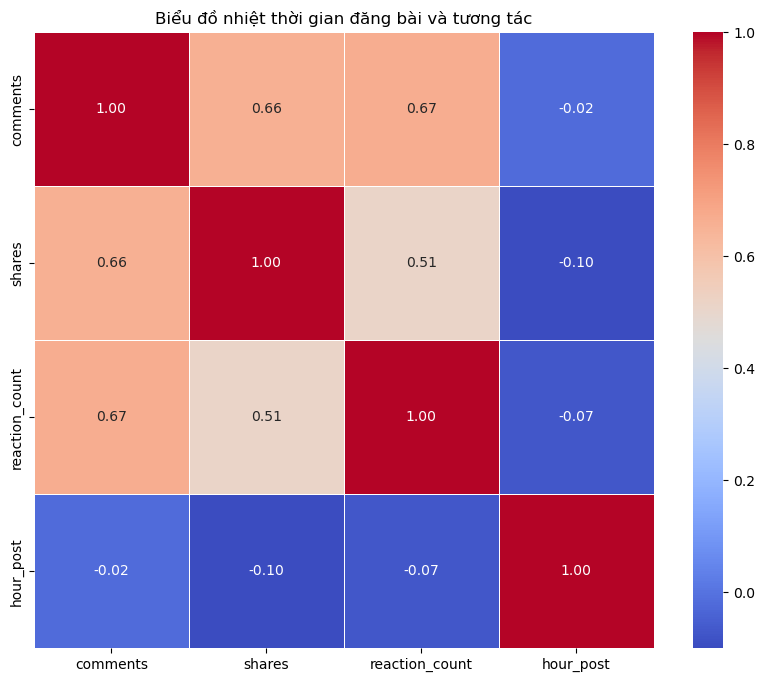

In [53]:
heat_matrix = heat_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(heat_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Biểu đồ nhiệt thời gian đăng bài và tương tác')
plt.savefig('heatmap.png')
plt.show()

# Xây dựng mô hình dự đoán độ dài post, thời gian đăng bài và reactions

In [38]:
%pip install -U scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 1.9 MB/s eta 0:00:05
     -                                        0.3/9.2 MB 4.4 MB/s eta 0:00:03
     ---                                      0.7/9.2 MB 7.7 MB/s eta 0:00:02
     ------                                   1.5/9.2 MB 11.6 MB/s eta 0:00:01
     ------------                             2.9/9.2 MB 16.8 MB/s eta 0:00:01
     ------------------                       4.3/9.2 MB 20.9 MB/s eta 0:00:01
     --------------------------               6.1/9.2 MB 24.2 MB/s eta 0:00:01
     --------------------------               6.1/9.2 MB 24.2 MB/s eta 0:00:01
     -----------------------------            6.8/9.2 MB 21.8 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 25.5 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing install

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ADB\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [46]:
time_post = data.time.dt.hour
time_post = time_post.astype(int)
length_post = data['post_text'].apply(len).copy()

data_train = pd.DataFrame({'time_post': time_post, 'length_post': length_post})
target = data['reaction_count']

X_train, X_test, y_train, y_test = train_test_split(data_train, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test.values.reshape(-1, 2))
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 17561659.21481777


C:\Users\ADB\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [49]:
ig, ax = plt.subplots()
scatter = ax.scatter(X_test['time_post'], X_test['length_post'], c=y_test, cmap='viridis', label='Thực tế')

ax.scatter(X_test['time_post'], X_test['length_post'], c=predictions, cmap='viridis', marker='x', s=100, label='Dự đoán')

ax.set_xlabel('Thời gian đăng bài')
ax.set_ylabel('Độ dài bài đăng')
ax.set_title('Biểu đồ so sánh thực tế và dự đoán')

cbar = plt.colorbar(scatter)
cbar.set_label('Số lượng phản ứng')

ax.legend()

plt.show()

### phân tích độ dài của bài post tương quan với lượng comment nhận được

In [55]:
length_post_comment = data[['comments', 'post_text']]
length_post_comment['length_post'] = length_post_comment['post_text'].apply(len)

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\816500627.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='length_post', y='comments', data=length_post_comment)
plt.title('Phân phối của độ dài post và lượng comment')
plt.xlabel('Độ dài của bài post')
plt.ylabel('Comments')
plt.savefig('tuong_tac_length_comment.png')
plt.show()


Các bài viết thường tập trung ở độ dài 200 - tức là các bài viết ngắn và lượng comment thường ở dưới 1000

-> các bài viết quá ngắn thường không có đủ nội dung để thảo luận 
-> các bài viết quá dài trên 600 từ đem lại lượng comment rất thấp cho thấy người theo dõi thường không quan tâm đến các bài viết kiểu thế này
-> nên tập trung vào các bài viết khoảng từ 200 - 400 từ vừa đẩy đủ nội dung lại có lượng commment khá ổn định : các bài viết này thường là các bài báo ngắn hoặc là tổng
kết kết quả bóng đá



### Lượng reactions có sự khác biết như thế nào trong từng loại

In [61]:
kind_reactions = ['thích', 'yêu thích', 'haha', 'thương thương', 'wow', 'buồn', 'phẫn nộ']
reactions_sum = data[kind_reactions].melt(var_name='reactions').groupby('reactions')['value'].sum().reset_index()
reactions_sum

reactions   value
0           buồn   11385
1           haha  119935
2        phẫn nộ     372
3          thích  942724
4  thương thương    2441
5            wow    1713
6      yêu thích   65596

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\926492664.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\ADB\AppData\Local\Temp\ipykernel_30364\926492664.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



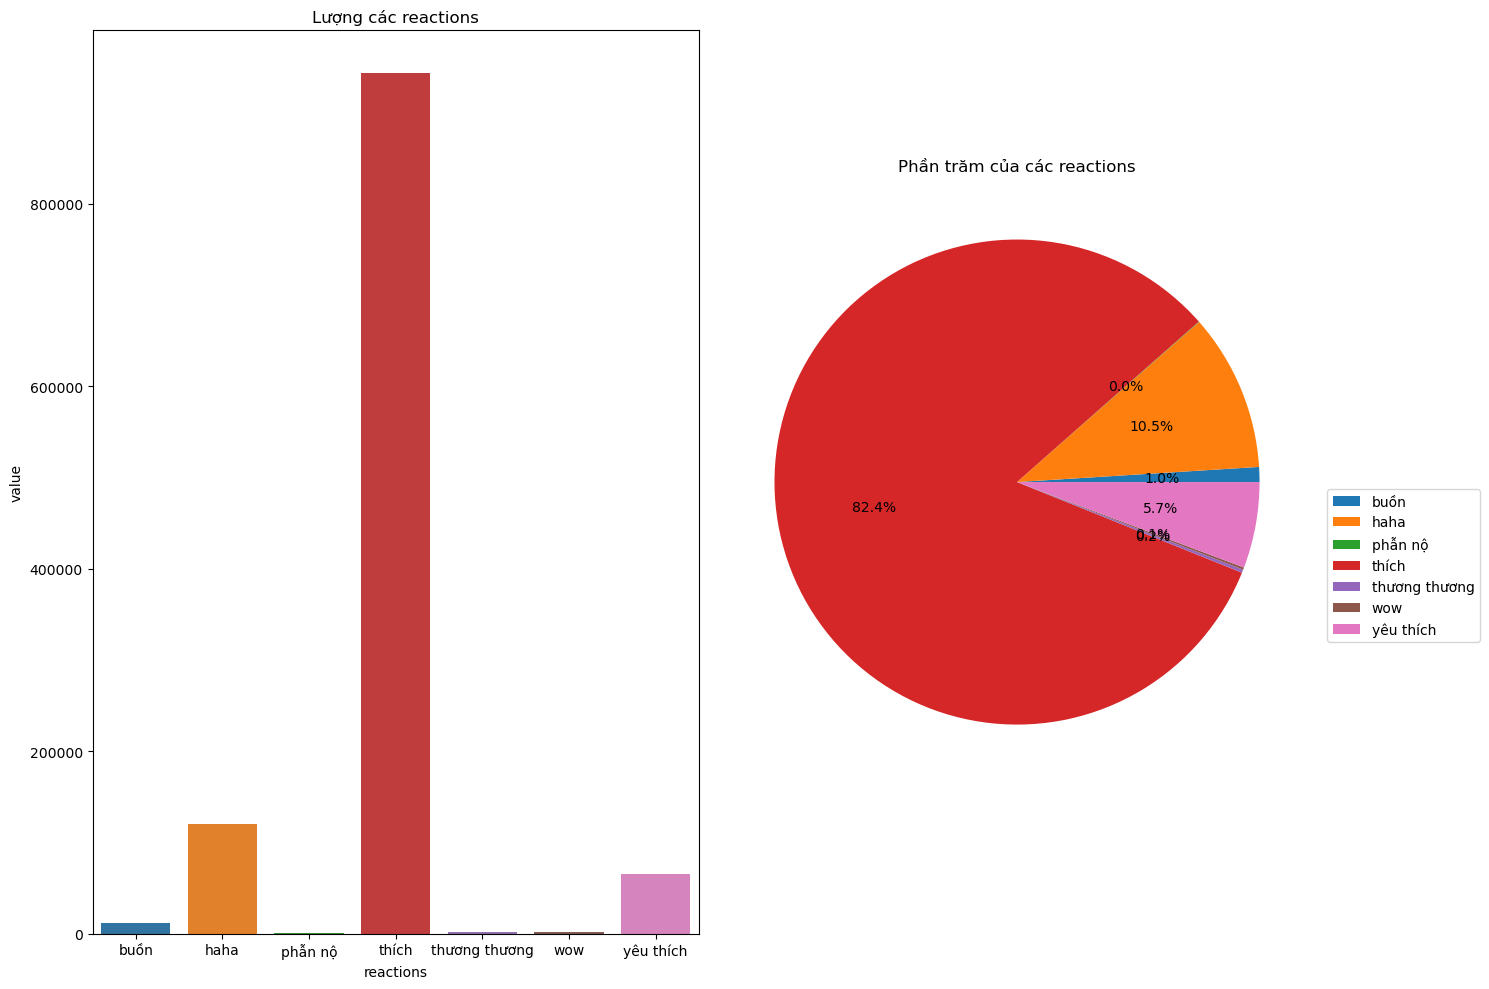

In [62]:
from matplotlib import gridspec
fig = plt.subplots(ncols = 2 ,  figsize=(15, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax1 = plt.subplot(gs[0])
sns.barplot(data = reactions_sum , x = 'reactions' , y = 'value')
ax1.set_title('Lượng các reactions')


ax2 = plt.subplot(gs[1])
plt.pie(reactions_sum['value'],autopct='%1.1f%%')
ax2.set_title('Phần trăm của các reactions')
ax2.legend(labels = reactions_sum['reactions'] , bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.savefig('kind_reactions.png')
plt.show()

data : lượng like chiếm phần lớn trong các reations sau đó là haha và yêu thích
bối cảnh: lượng người dùng khi lướt qua bài viết hầu hết là like do nó là biểu tượng nút trong tương tác , lượng haha và yêu thích tổng cộng chỉ chiếm 16% tuy nhiê
đều là những người dùng quan tâm đến các bài viết

### Phân tích từ ngữ suất hiện nhiều nhất trong các post

In [732]:
%pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -------                               30.7/151.4 kB 660.6 kB/s eta 0:00:01
     ----------------------------           112.6/151.4 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
data_text = data['post_text']
text = str(data_text)

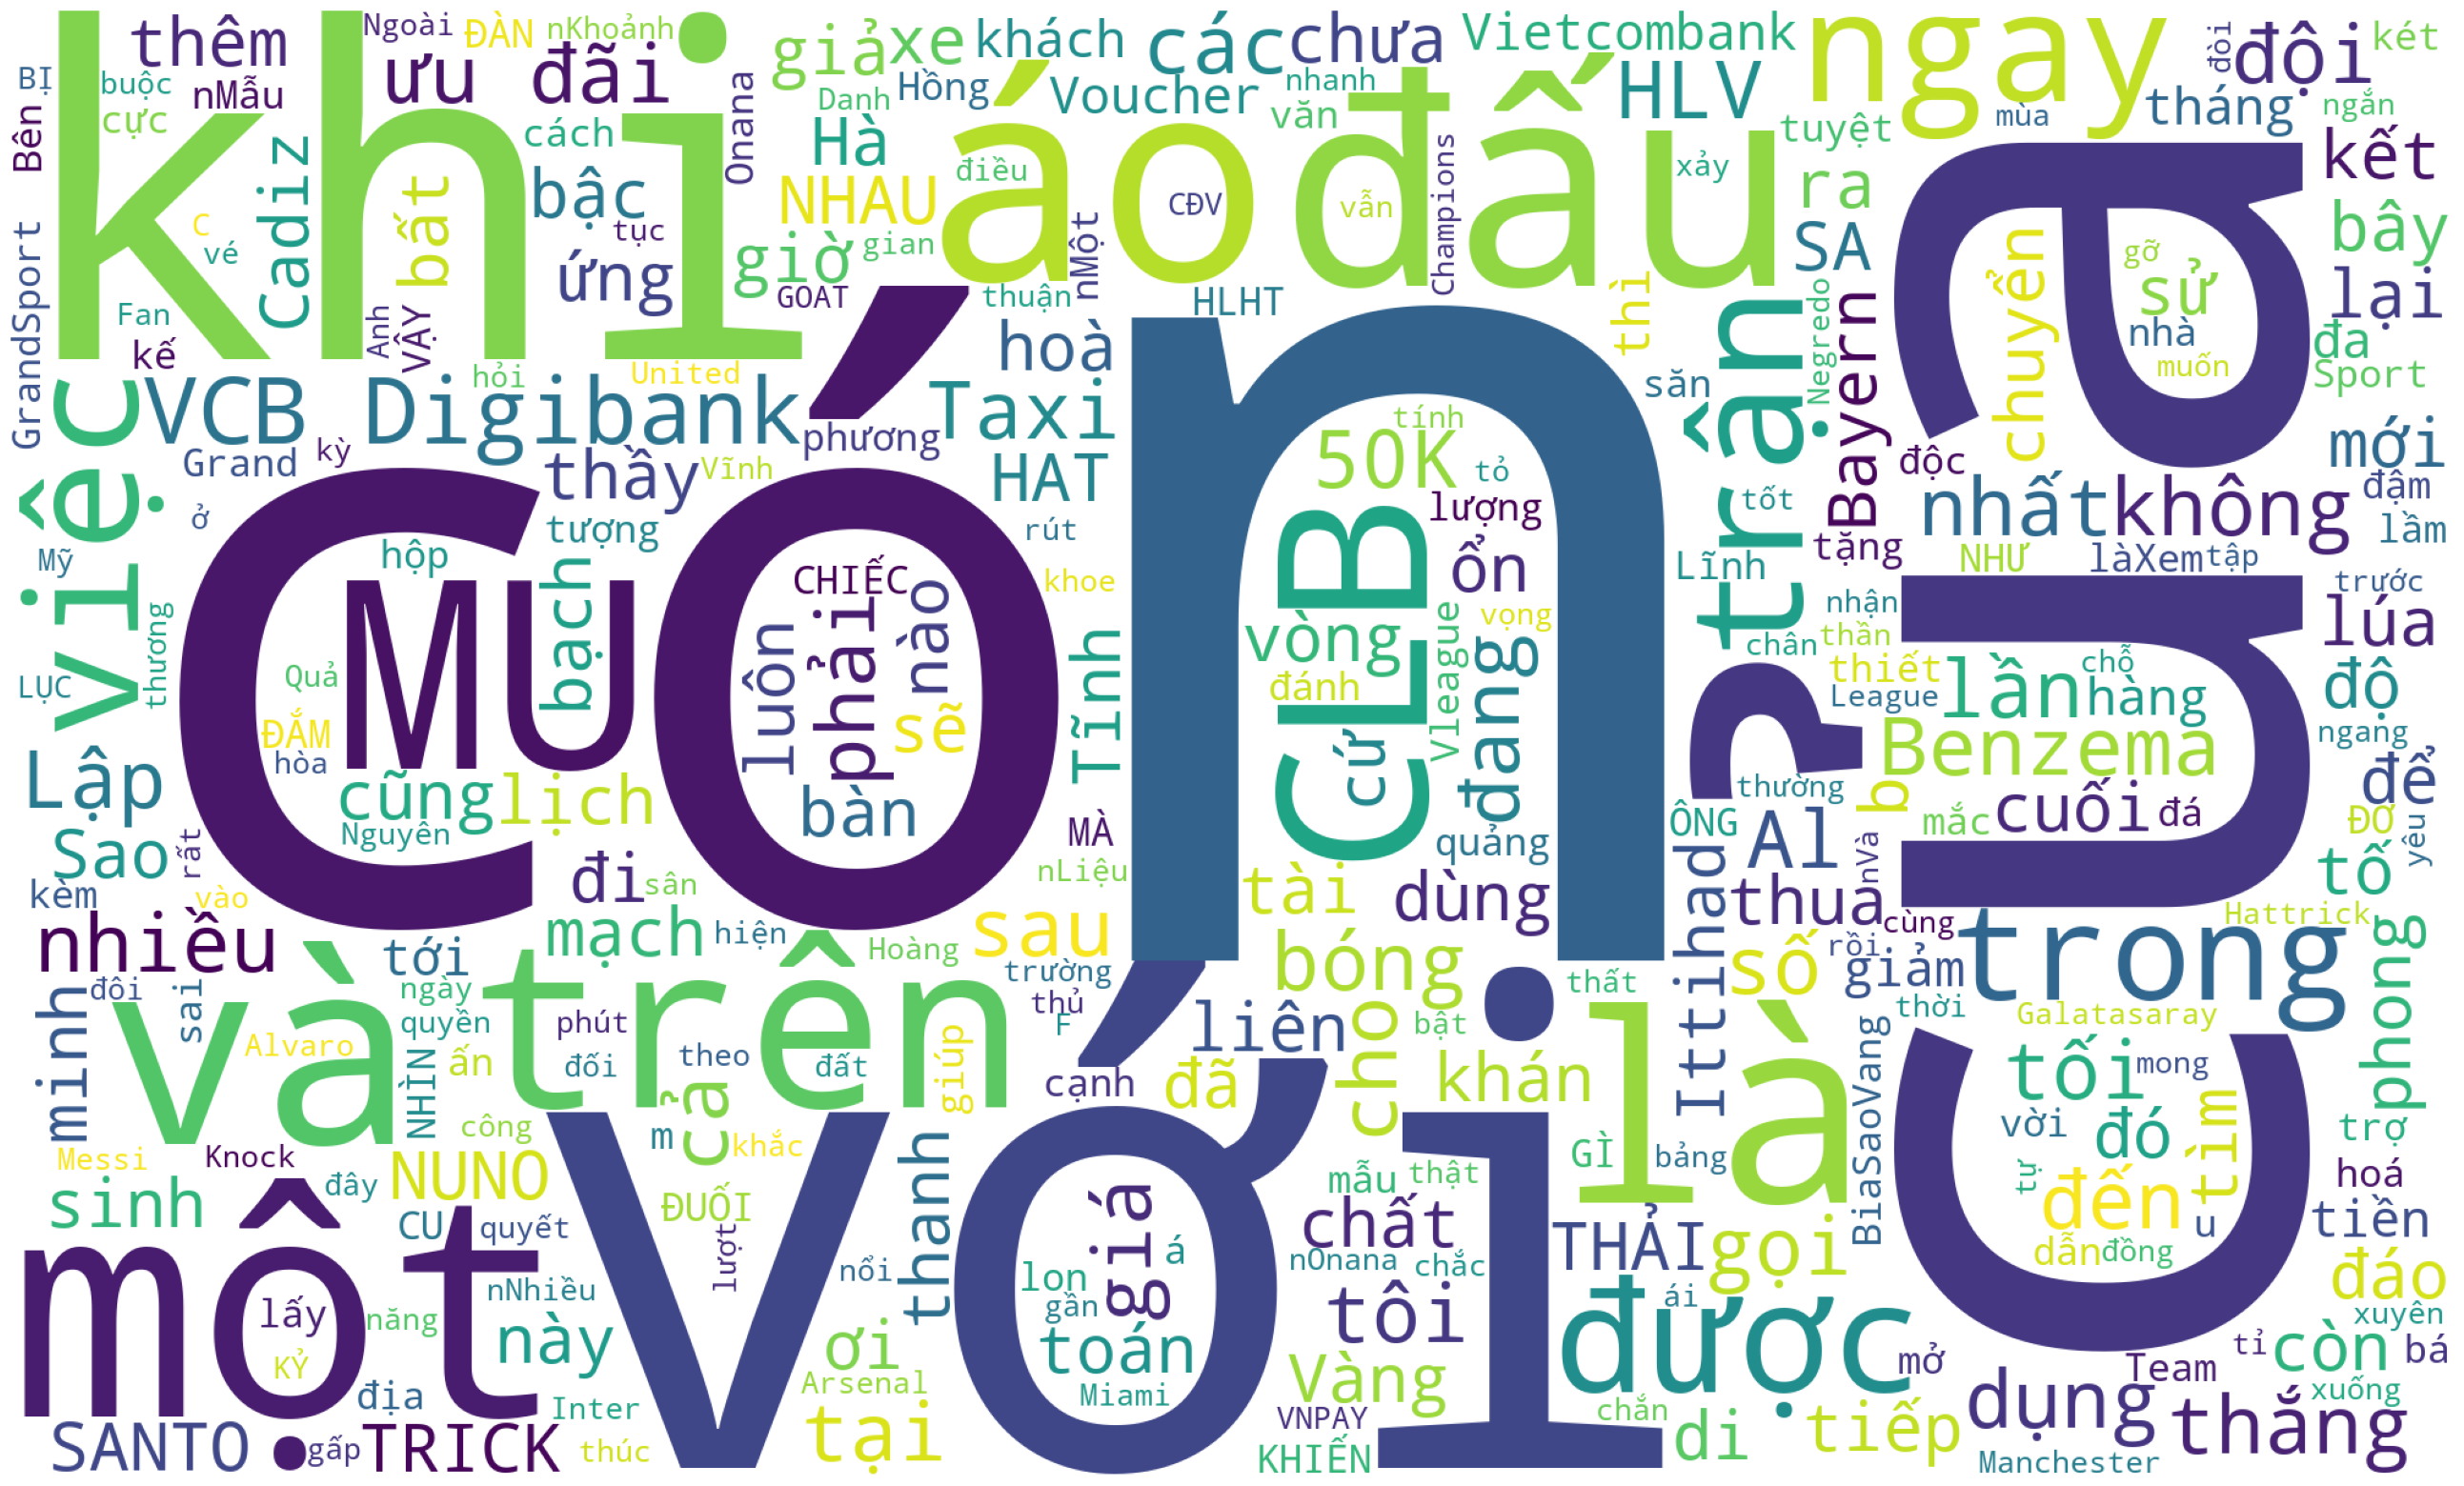

In [65]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('top_word_post.png')
plt.show()

In [736]:
data_word = data.sort_values(by = 'reaction_count', ascending = False).head(10)

NameError: name 'nltk' is not defined

In [749]:
top_10_post = data.sort_values(by = 'reaction_count', ascending = False).head(10)
top_10_post.shape

(10, 19)

In [751]:
lenght_post = top_10_post['post_text'].apply(len)
lenght_post

58      64
32     160
196    123
131     72
151     48
157     96
56      37
153    320
38     168
90      60
Name: post_text, dtype: int64

In [764]:
text = data['post_text'].str.cat(sep = ' ')

'Nói cái gì nữa về màn trình diễn của anh tôi đi?\n\nSiuuuuuuuuuu 🐐 🚨 Cristiano Ronaldo va chạm trong vòng cấm và trọng tài thổi penalty cho Al Nassr, anh đã đến giải thích với trọng tài rằng “đó không phải penalty”.\n\nAnh tôi ❤️ Al Nassr sẽ không thi đấu trong tháng Một tới.\n\n6 tháng cho mượn đến Real Madrid, một CLB đang cần tiền đạo, tại sao không? NUNEZ XÉ LƯỚI ARGENTINA PHÚT 87 :v 2-0 cho Uruguay chắc là xong phim rồi Bầu không khí tuyệt vời tại SV Werder Bremen 🥰🥰🥰 Haaland, Kane hay Mbappe thì không có gì lạ, nhưng lại có ông sắp 39 tuổi ở đây 😳 Quá nể Ronaldo Ronaldo Airline ✈ Bật nhảy khiếp thật Đây là Nicolas Capaie Kutran, thủ thành 15 tuổi của ĐT U17 New Caledonia 🇳🇨 đang tham dự VCK U17 World Cup. 🏆\n\n- Trận đầu tiên gặp U17 Anh 🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f: nhận 39 cú sút, thủng lưới 10 bàn.\n\n- Trận thứ hai gặp U17 Brazil 🇧🇷: nhận 81 cú sút, thủng lưới 9 bàn.\n\nHy vọng em trai vẫn sẽ vững vàng và không từ bỏ giấc mơ của mình 🥲💔 ⚽️ Lậ

In [765]:
def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts
print( word_count(text))


{'CHIẾC': 1, 'ÁO': 1, 'ĐẤU': 1, 'CÓ': 2, 'GÌ': 2, 'MÀ': 1, 'KHIẾN': 1, 'ĐÀN': 1, 'ÔNG': 1, 'NHÌN': 1, 'NHAU': 1, 'ĐẮM': 1, 'ĐUỐI': 1, 'NHƯ': 1, 'VẬY?': 1, 'Mẫu': 1, 'áo': 8, 'đấu': 27, 'của': 64, 'CLB': 20, 'Hồng': 1, 'Lĩnh': 1, 'Hà': 12, 'Tĩnh': 2, 'nhà': 9, 'tài': 11, 'trợ': 4, 'Grand': 1, 'Sport': 1, 'được': 34, 'đánh': 1, 'giá': 4, 'là': 45, 'mẫu': 1, 'có': 41, 'thiết': 1, 'kế': 2, 'ấn': 1, 'tượng': 4, 'bậc': 3, 'nhất': 15, 'Vleague': 1, '🥰🥰🥰': 17, 'Bên': 1, 'cạnh': 3, 'đó': 11, 'làXem': 1, 'thêm': 19, 'việc': 10, 'mở': 4, 'b.á.n': 1, 'cũng': 9, 'độc': 1, 'đáo': 2, 'với': 41, 'khi': 27, 'm.u.a': 1, 'một': 28, 'khán': 4, 'giả': 3, 'tặng': 2, 'ngay': 7, 'hộp': 1, 'CU': 1, 'ĐƠ': 1, 'đậm': 1, 'chất': 2, 'kèm': 1, '1': 17, 'lon': 1, 'sinh': 2, 'tố': 3, 'lúa': 2, 'mạch': 2, '“B.I.A”': 1, 'Sao': 1, 'Vàng': 7, 'cực': 5, 'lượng': 1, '👏👏👏': 9, 'Một': 7, 'cách': 6, 'tuyệt': 7, 'vời': 7, 'dùng': 3, 'bóng': 21, 'đá': 10, 'để': 14, 'quảng': 1, 'bá': 2, 'văn': 1, 'hoá': 1, 'địa': 2, 'phương': 2, 

In [779]:
count_text = word_count(text)

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [781]:
count_text = sorted(count_text.items(), key=lambda x: x[1], reverse=True)

In [790]:
top_word = dict(count_text[:100]) 

In [791]:
top_word

{'của': 64,
 'và': 54,
 'cho': 46,
 'là': 45,
 'có': 41,
 'với': 41,
 'không': 35,
 'được': 34,
 'đã': 34,
 'trong': 33,
 'các': 31,
 'sẽ': 30,
 'một': 28,
 '🚨': 28,
 'Ronaldo': 28,
 'đấu': 27,
 'khi': 27,
 'thủ': 27,
 'Việt': 27,
 'Nam': 25,
 'bàn': 24,
 'tại': 23,
 'Bremen': 23,
 'lại': 22,
 'anh': 22,
 'đầu': 22,
 'bóng': 21,
 'ra': 21,
 '❌': 21,
 'CLB': 20,
 'trận': 20,
 'vào': 20,
 'thêm': 19,
 'đến': 19,
 'từ': 19,
 'Phat': 19,
 'thầy': 18,
 'phải': 18,
 'cầu': 18,
 'trên': 18,
 'Freestyle': 18,
 '🥰🥰🥰': 17,
 '1': 17,
 '✅': 17,
 'ở': 16,
 'những': 16,
 'giải': 16,
 'nhất': 15,
 'thắng': 15,
 'tạo': 15,
 'thế': 15,
 '-': 15,
 'này': 15,
 '🚑': 15,
 'để': 14,
 'MU': 14,
 'nhận': 14,
 'bị': 14,
 'thứ': 14,
 'Messi': 14,
 'Cristiano': 14,
 'thì': 14,
 'thể': 14,
 'Werder': 14,
 'đội': 13,
 '🔥': 13,
 'kiến': 13,
 'Hà': 12,
 'rất': 12,
 'vẫn': 12,
 'vòng': 12,
 'sau': 12,
 'tôi': 12,
 'tuổi': 12,
 'sân': 12,
 'hiện': 12,
 'nhiều': 12,
 'VĐV': 12,
 'tài': 11,
 'đó': 11,
 'dẫn': 11,
 '🙂': 

In [796]:
word_analize = ['Ronaldo' , 'Messi' , 'Bremen', 'Việt' , 'bóng' , 'Bundesliga', 'VDV', 'Freestyle', 'CLB', 'MU']

In [800]:
data_word = pd.DataFrame(list(top_word.items()), columns = ['Word', 'Frequency'])

Word  Frequency
0    của         64
1     và         54
2    cho         46
3     là         45
4     có         41
5    với         41
6  không         35
7   được         34
8     đã         34
9  trong         33

In [801]:
data_word = data_word[data_word['Word'].isin(word_analize)]

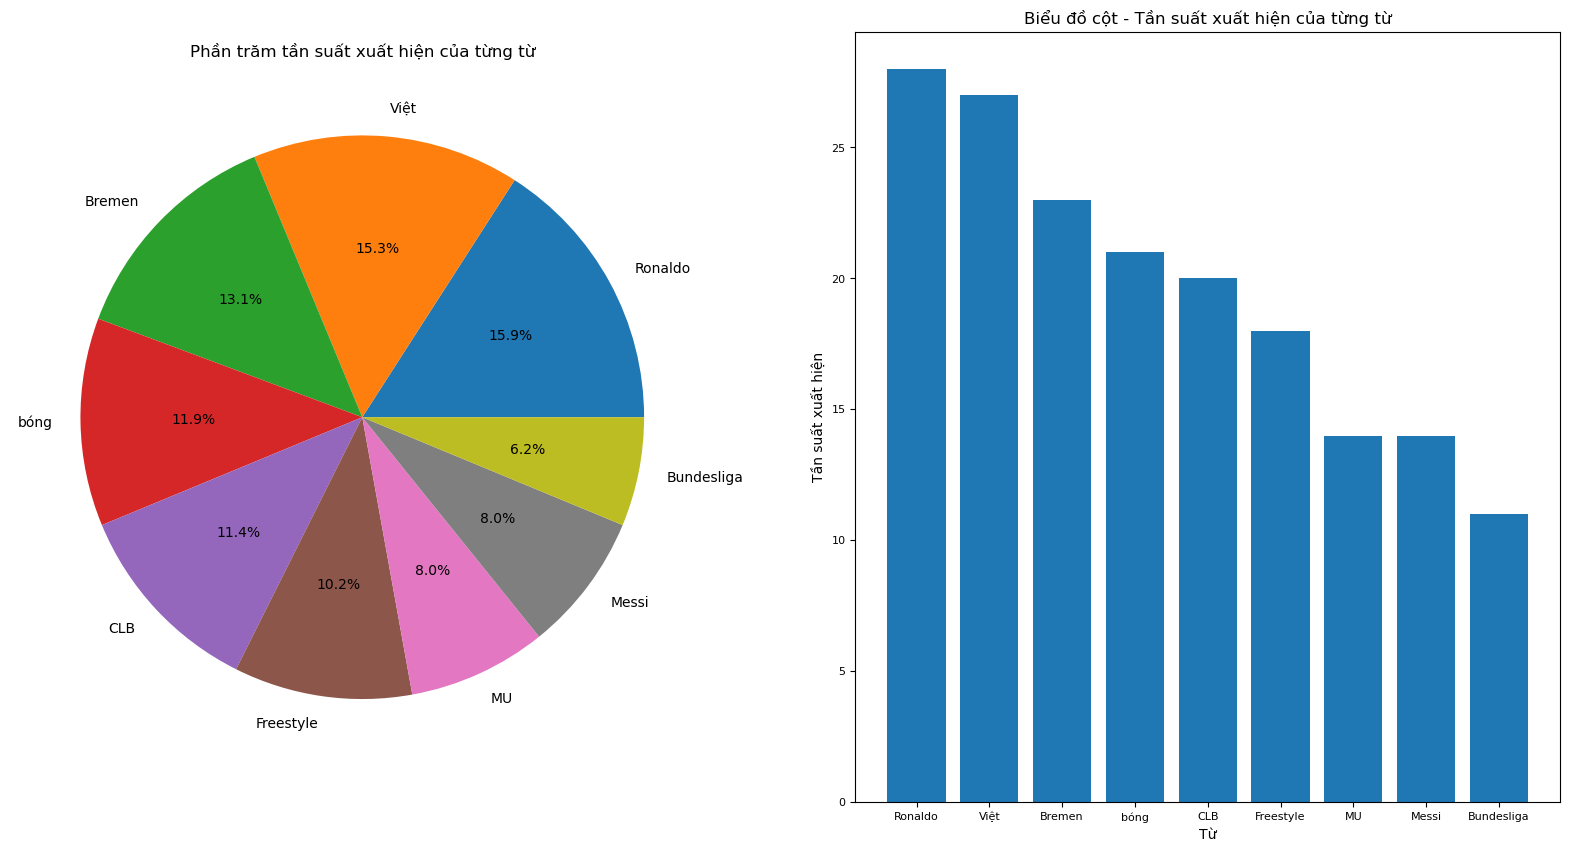

In [851]:
fig, (ax1, ax2) = plt.subplots(ncols = 2 ,  figsize=(20, 10))
ax2.bar(data_word['Word'], data_word['Frequency'])
ax2.set_title('Biểu đồ cột - Tần suất xuất hiện của từng từ')
ax2.set_xlabel('Từ')
ax2.set_ylabel('Tần suất xuất hiện')
ax2.tick_params(labelsize = 8)

ax1.pie(data_word['Frequency'], labels=data_word['Word'], autopct='%1.1f%%')
ax1.set_title('Phần trăm tần suất xuất hiện của từng từ')
plt.show()

### so sánh các bài post có từ khóa ronaldo hoặc messi

In [66]:
ronaldo = data[data['post_text'].str.contains('Ronaldo', case = False)].head(10)

In [67]:
messi = data[data['post_text'].str.contains('Messi' , case = False)].head(10)

In [68]:
selected_columns = ['thích' , 'yêu thích' , 'haha' , 'thương thương' , 'wow' , 'buồn' , 'phẫn nộ']

In [69]:
df_combined = pd.concat([messi[selected_columns], ronaldo[selected_columns]], keys=['Messi', 'Ronaldo'], names=['Player'])
df_combined_melted = pd.melt(df_combined.reset_index(), id_vars=['Player'], value_vars=selected_columns, var_name='Reaction', value_name='Count')

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Reaction', hue='Player', data=df_combined_melted, palette='muted' , orient = 'h')
plt.title('So sánh các reactions giữa Messi và Ronaldo')
plt.savefig('Ronaldo_vs_Messi.png')
plt.show()

post_text                time  \
0  CHIẾC ÁO ĐẤU CÓ GÌ MÀ KHIẾN ĐÀN ÔNG NHÌN NHAU ... 2023-11-30 10:49:45   
1  MU đang dẫn 3-1, Onana mắc sai lầm giúp Galata... 2023-11-30 09:58:33   
2  MU buộc phải thắng Bayern ở lượt cuối và mong ... 2023-11-30 07:18:39   
3                       4-0 cho Arsenal sau 27 phút. 2023-11-30 03:30:20   
4  🚨 KỶ LỤC: Manchester United đã nhận 14 bàn thu... 2023-11-30 02:57:54   

                                               image  \
0                                                NaN   
1                                                NaN   
2  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                    image_lowquality  \
0  https://scontent.fhan14-2.fna.fbcdn.net/v/t39....   
1  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
2  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                              images  comments  shares  \
0                                                 []        13       1   
1                                                 []       259       1   
2  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...      1342       9   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...       162       9   
4  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...       730      29   

                                       comments_full  \
0  [{'comment_id': '222356870892622', 'comment_ur...   
1  [{'comment_id': '304795935727413', 'comment_ur...   
2  [{'comment_id': '1501303200659427', 'comment_u...   
3  [{'comment_id': '1027433061916190', 'comment_u...   
4  [{'comment_id': '697076962502444', 'comment_ur...   

                                                 url  \
0  https://www.facebook.com/TuyenVanHoaOfficial/p...   
1  https://www.facebook.com/TuyenVanHoaOfficial/p...   
2  https://www.facebook.com/TuyenVanHoaOfficial/p...   
3  https://www.facebook.com/TuyenVanHoaOfficial/p...   
4  https://www.facebook.com/TuyenVanHoaOfficial/p...   

                                           reactions  reaction_count  thích  \
0  {'thích': 171, 'yêu thích': 20, 'haha': 2, 'th...             194    171   
1  {'thích': 1064, 'yêu thích': 2, 'haha': 359, '...            1447   1064   
2  {'thích': 3155, 'yêu thích': 20, 'haha': 1706,...            4935   3155   
3  {'thích': 3671, 'yêu thích': 59, 'haha': 409, ...            4150   3671   
4  {'thích': 2093, 'yêu thích': 10, 'haha': 1564,...            3751   2093   

   yêu thích  haha  thương thương  wow  buồn  phẫn nộ  \
0         20     2              1    0     0        0   
1          2   359              1    2    18        1   
2         20  1706              5   12    31        6   
3         59   409              2    7     2        0   
4         10  1564              3   10    60       11   

                                       comments_text  
0  [Lập team đá bóng ăn cu đơ các thầy ơi 🙈🙈🙈, Ch...  
1  [2 quả đá phạt vào hài vclll, HLV Park đang th...  
2  [Mu đá hay vkl, Về đá EPL tiếp thôi…, Học trò ...  
3  [Nguyễn Xuân Nhật 🙂, Chắc phải mua c2 uống rồi...  
4  [đến giờ vẫn k hiểu tại sao lai k gia hạn với ...

### từ ngữ suất hiện nhiều nhất trong comment

In [72]:
data['comments_text'] = data['comments_text'].astype(str)
text = data['comments_text'].str.cat(sep = ' ')


In [1045]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


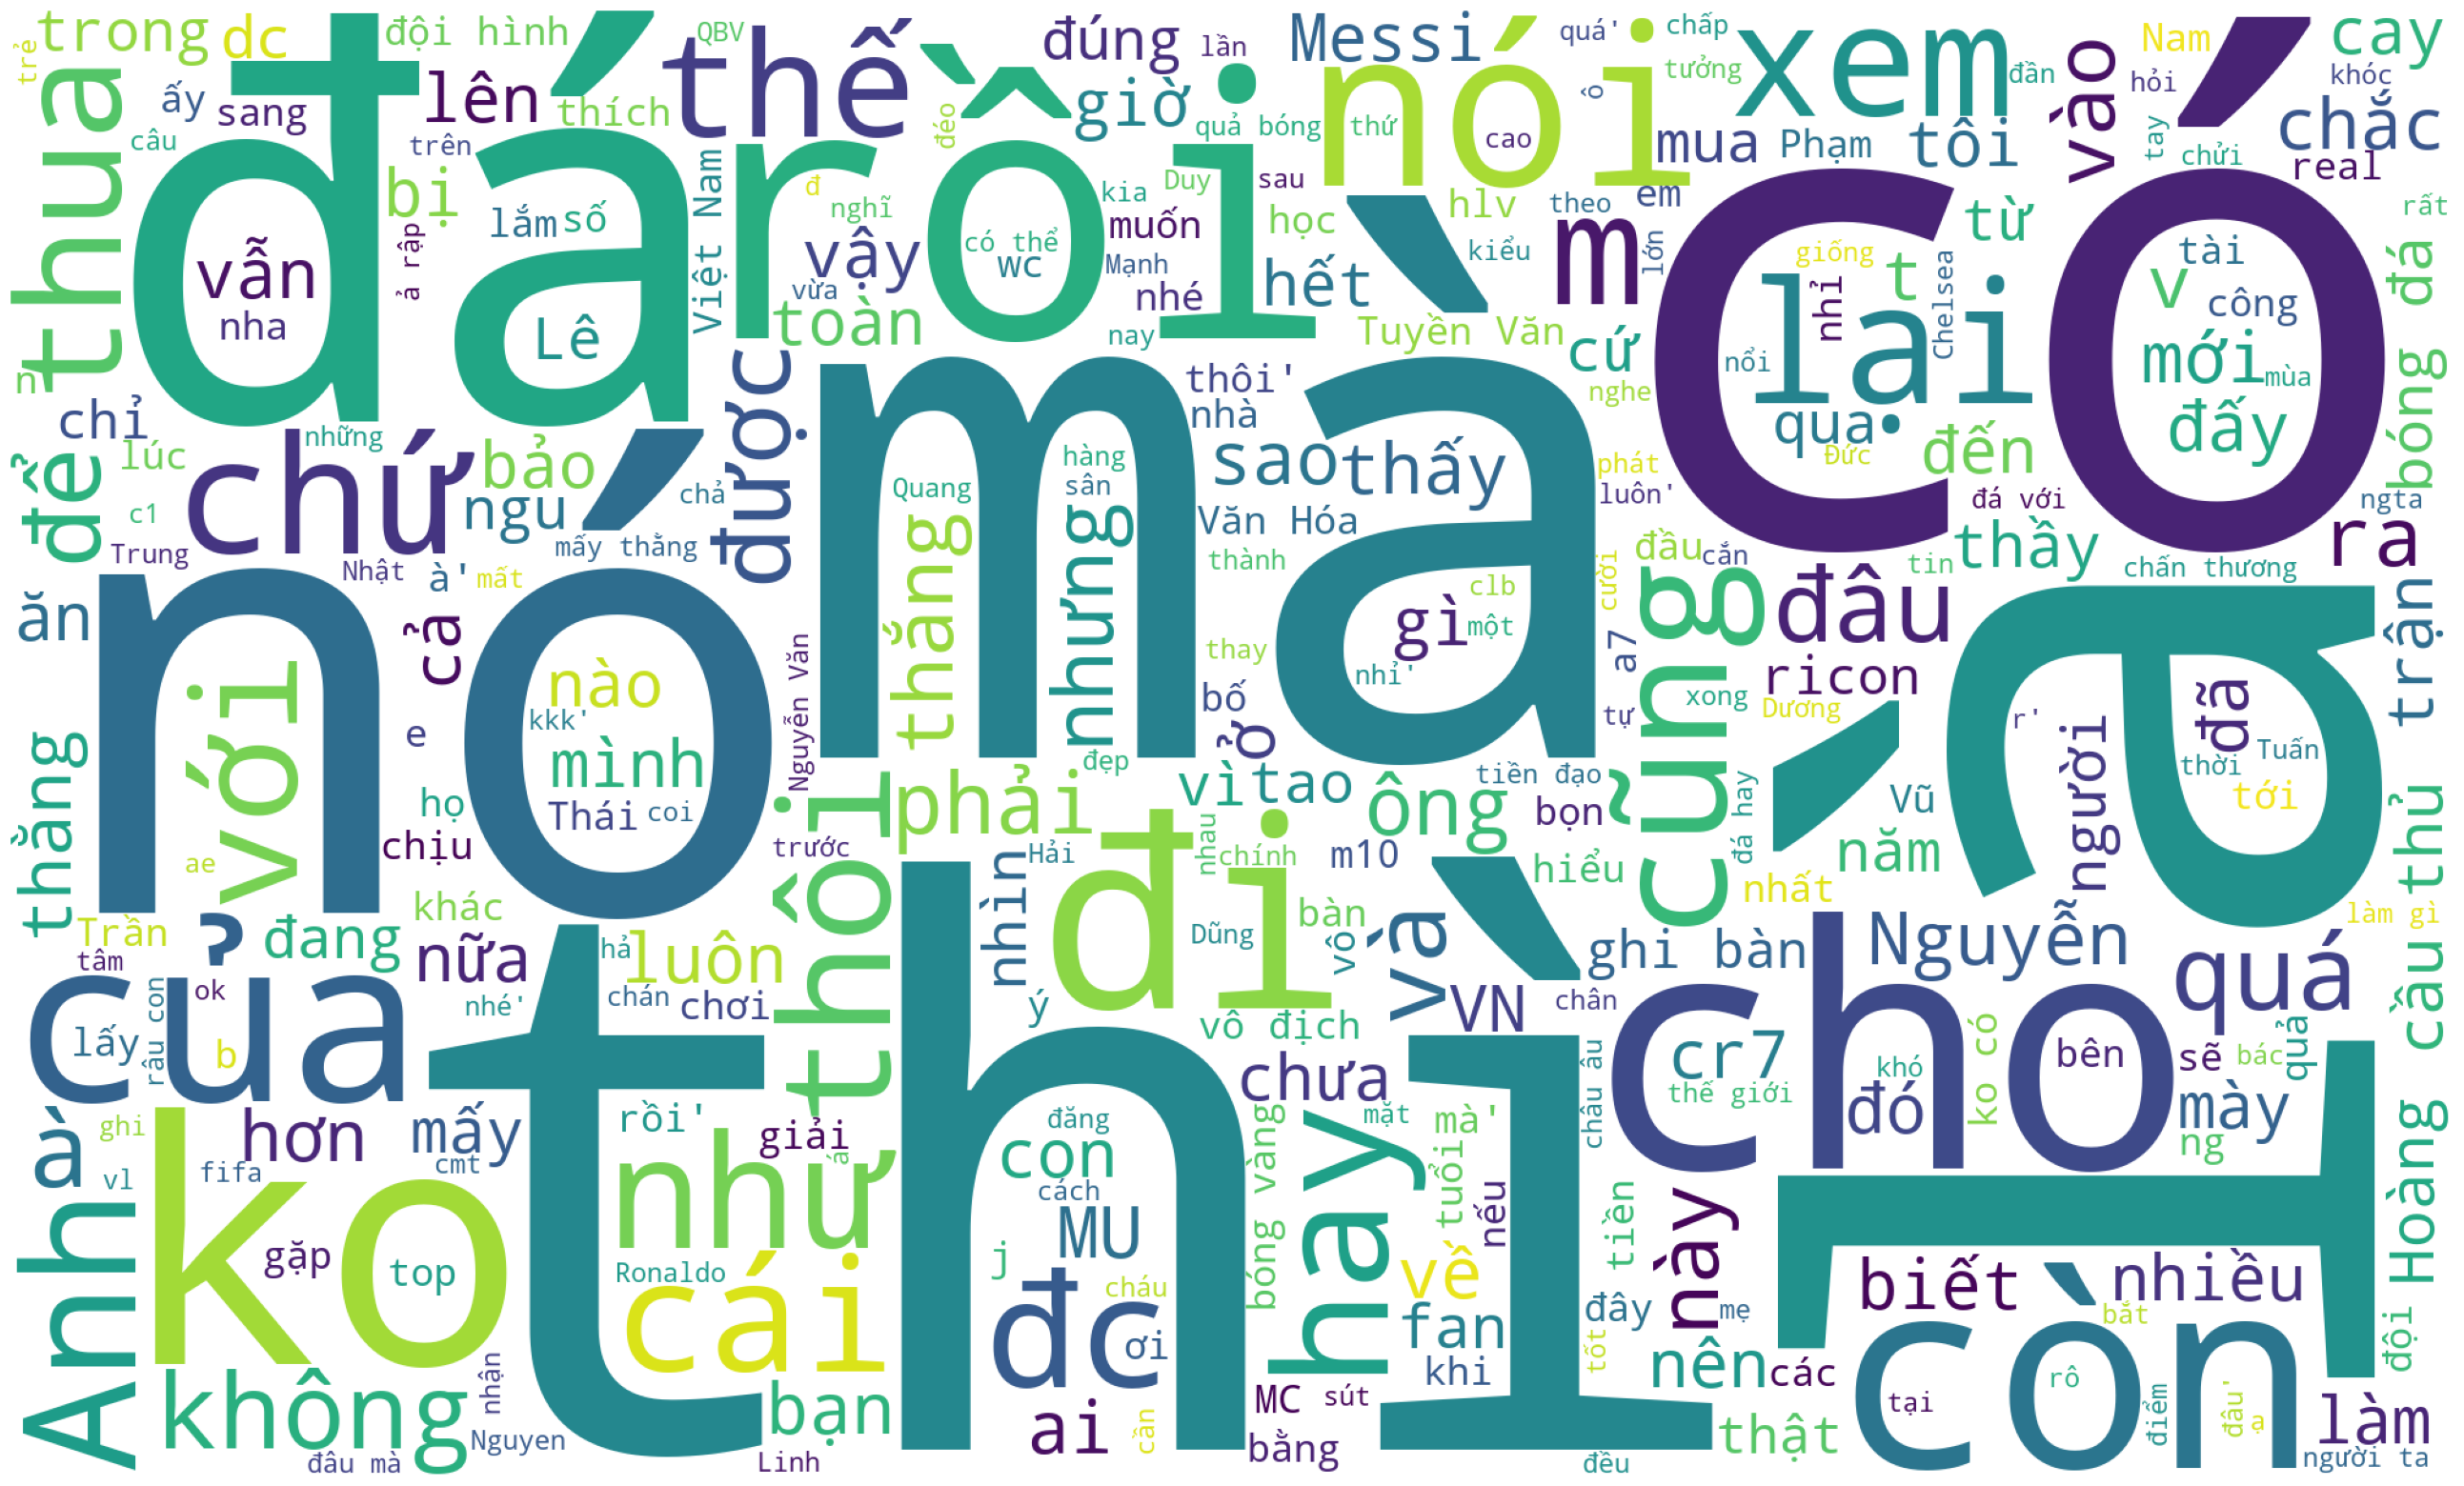

In [73]:

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('top_comments.png')
plt.show()